<a href="https://colab.research.google.com/github/darshanrao/AR_Region_Classification/blob/main/AR_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import tensorflow as tf

import time
import PIL.Image as Image
import matplotlib.pylab as plt
import tensorflow_hub as hub
import datetime

%load_ext tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Functions

In [ ]:
def normalized(img):
    normalized_input = (img - np.amin(img)) / (np.amax(img) - np.amin(img))
    return 2*normalized_input-1

In [ ]:
def normalizedp(img):
    normalized_input = (img - np.amin(img)) / (np.amax(img) - np.amin(img))
    return normalized_input

In [ ]:
def normalizedn(img):
    normalized_input = (img - np.amin(img)) / (np.amax(img) - np.amin(img))
    return normalized_input-1

In [ ]:
def plotMean(arr,title,cmap='viridis'):
  font1 = {'family':'serif','color':'Black','size':15}
  arr_mean=np.nanmean(arr,axis=(0))
  plt.imshow(arr_mean,vmax=abs(arr_mean).max(), vmin=-abs(arr_mean).max(),cmap=cmap)
  plt.colorbar()
  plt.xticks([ ])
  plt.yticks([ ])
  plt.title(title,fontdict = font1)

In [ ]:
data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield.npz')
lst = data.files
print(lst)
for item in lst:
    print(item)
    print(data[item].shape)
    dataset=data[item]

['arr']
arr
(512, 512, 51)


In [ ]:
dataset = np.nan_to_num(dataset)
np.isnan(dataset).any()

False

In [ ]:
new_list=[]
for i in range(51):
    for j in range(150):
        x=np.random.randint(42,512-42)
        y=np.random.randint(42,512-42)
        new_list.append(dataset[x-42:x+43, y-42:y+43,i])
new_dataset = np.array(new_list)
print(new_dataset.shape)
#Normalization 
for i in range(len(new_dataset)):
    new_dataset[i]=normalized(new_dataset[i])

(7650, 85, 85)


# Synthetics Generation

In [ ]:
shift=5
thres1,thres2,thres3=0.3,0.6,0.8
posi=[]
rn=3
for i in range(51):
  for j in range(75):
    rnx=np.random.randint(-rn,rn)
    rny=np.random.randint(-rn,rn)
    p=np.zeros((85, 85))
    x=np.random.randint(50,512-50)
    y=np.random.randint(50,512-50)
    img=dataset[x-4:x+4, y-4:y+4,i]
    mres3=np.array(list(zip(*np.where(img>thres3))))
    for ii in range(len(mres3)):
      x=np.random.randint(43-2,43+2)
      y=np.random.randint(43-2,43+2)
      p[x+rnx,y-shift+rny] = img[mres3[ii,0],mres3[ii,1]]
    mres2=np.array(list(zip(*np.where(img>thres2))))
    for ii in range(len(mres2)):
      x=np.random.randint(43-3,43+3)
      y=np.random.randint(43-3,43+3)
      p[x+rnx,y-shift+rny] = img[mres2[ii,0],mres3[ii,1]]
    mres1=np.array(list(zip(*np.where(img>thres1))))
    for ii in range(len(mres1)):
      x=np.random.randint(43-4,43+4)
      y=np.random.randint(43-4,43+4)
      p[x+rnx,y-shift+rny] = img[mres1[ii,0],mres3[ii,1]]
        
    posi.append(normalizedp(p))  

negi=[]
for i in range(51):
  x0=dataset[:,:,i].copy()
  x0=normalized(x0)
  x0=np.where(x0<0,x0,0)
  for j in range(75):
    rnx=np.random.randint(-rn,rn)
    rny=np.random.randint(-rn,rn)
    n=np.zeros((85, 85))
    x=np.random.randint(50,512-50)
    y=np.random.randint(50,512-50)
    img=dataset[x-5:x+5, y-5:y+5,i]
    mres3=np.array(list(zip(*np.where(img<-thres3))))
    for ii in range(len(mres3)):
      x=np.random.randint(43-2,43+2)
      y=np.random.randint(43-2,43+2)
      n[x+rnx,y+shift+rny] = img[mres3[ii,0],mres3[ii,1]]
    mres2=np.array(list(zip(*np.where(img<-thres2))))
    for ii in range(len(mres2)):
      x=np.random.randint(43-4,43+4)
      y=np.random.randint(43-4,43+4)
      n[x+rnx,y+shift+rny] = img[mres2[ii,0],mres3[ii,1]]
    mres1=np.array(list(zip(*np.where(img<-thres1))))
    for ii in range(len(mres1)):
      x=np.random.randint(43-6,43+5)
      y=np.random.randint(43-6,43+5)
      n[x+rnx,y+shift+rny] = img[mres1[ii,0],mres3[ii,1]]
        
    negi.append(normalizedn(n)) 

      
    


pr=[]
for i in range(int(len(new_dataset)/2)):
  pr.append(normalized((posi[i]+negi[i])))

pure_region = np.array(pr)   
pure_region.shape


pure_region.shape

pure_region = np.nan_to_num(pure_region)
np.isnan(pure_region).any()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


False

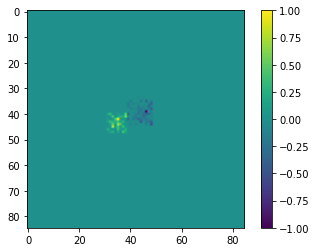

In [ ]:
plt.imshow(pure_region[4])
plt.colorbar()

([], <a list of 0 Text major ticklabel objects>)

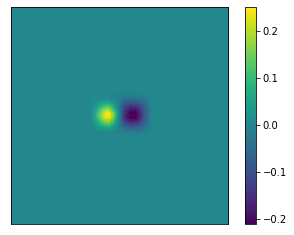

In [ ]:
pure_mean=np.nanmean(pure_region,axis=(0))
plt.imshow(pure_mean)
plt.colorbar()
plt.xticks([ ])
plt.yticks([ ])

In [ ]:
# fig, axes = plt.subplots(6,8, figsize = (64,32))
# count=0
# for i in range(6):
#     for j in  range(8):
#         axes[i,j].imshow(posi[count])
#         count+=1

In [ ]:
# pi=[5,7,10,12,19,27,35,38,41,42,44,45,49,50]
# b1=[]
# for i in range(len(posi)):
#   for x in pi:
#     if x==i:
#       b1.append(posi[i])
# len(b1)

In [ ]:
# fig, axes = plt.subplots(2,7, figsize = (64,16))
# count=0
# for i in range(2):
#     for j in  range(7):
#         axes[i,j].imshow(b1[count])
#         count+=1

In [ ]:
# from tempfile import TemporaryFile
# np.savez_compressed("synthetics3.npz",pureregion=pure_region)

In [ ]:
# fig, axes = plt.subplots(4,10, figsize = (64,32))
# count=0
# for i in range(4):
#     for j in  range(10):
#         axes[i,j].imshow(negi[count])
#         count+=1

# Synthetics Load

In [ ]:
data = np.load('drive/MyDrive/Bfield Research/Synthetics/synthetics3.npz')
lst = data.files
print(lst)
for item in lst:
    print(item)
    print(data[item].shape)
    pure_region=data[item]

['pureregion']
pureregion
(3825, 85, 85)


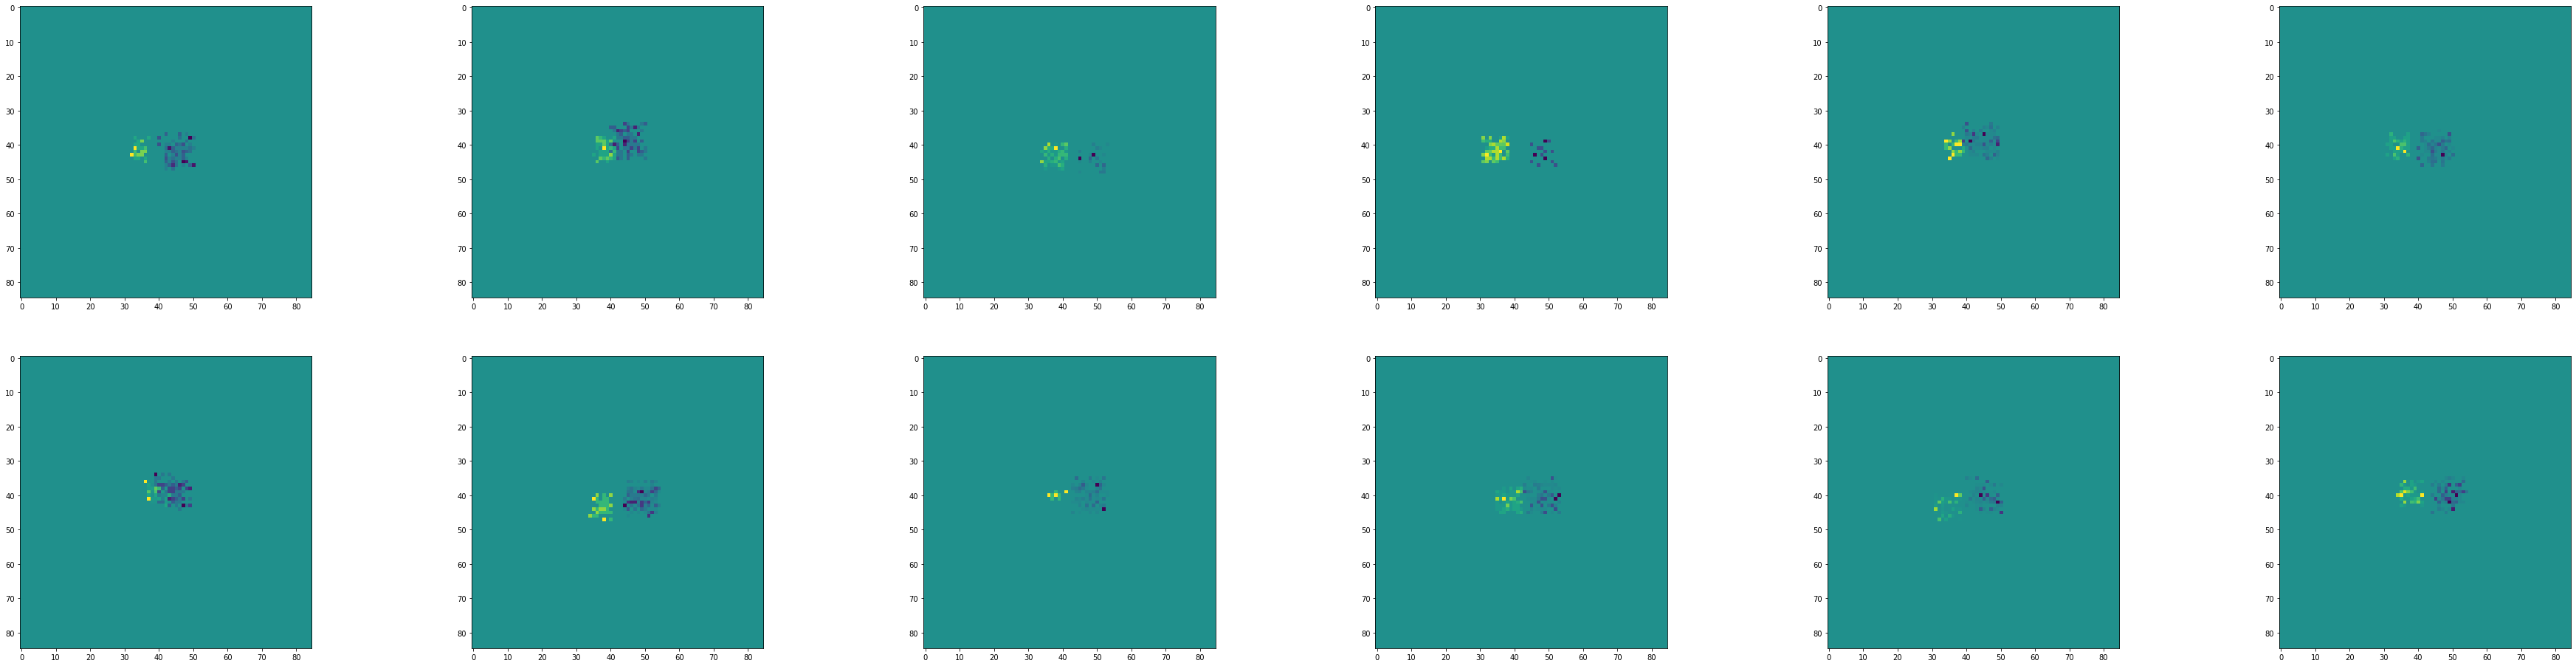

In [ ]:
fig, axes = plt.subplots(2,6, figsize = (64,16))
count=0
for i in range(2):
  for j in  range(6):
    axes[i,j].imshow(pure_region[count])
    count+=1

# SNR

In [ ]:
SNR=4

[4.5817352  5.19603872 3.52347592 ... 1.39420855 4.0909251  4.35139331]


(array([   5.,   25.,  125.,  432.,  884., 1068.,  849.,  333.,   91.,
          13.]),
 array([-0.00962598,  0.7336765 ,  1.47697898,  2.22028147,  2.96358395,
         3.70688644,  4.45018892,  5.1934914 ,  5.93679389,  6.68009637,
         7.42339885]),
 <a list of 10 Patch objects>)

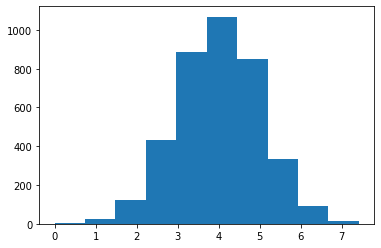

In [ ]:
mean=SNR
var=1
s = np.random.normal(mean, var, size=int(len(new_dataset)/2))
print(s)
plt.hist(s)

In [ ]:
exp1=new_dataset[:100].copy()
for i in range(len(exp1)):
    exp1[i]*=s[i]
    # print(exp1[i],s[i])
    exp1[i]+=pure_region[i]
    exp1[i]=normalized(exp1[i])

# fig, axes = plt.subplots(2,6, figsize = (64,16))
# count=0
# for i in range(2):
#     for j in  range(6):
#         ax=axes[i,j].imshow(exp1[count])
#         # fig.colorbar(ax)
#         count+=1

In [ ]:
exp1.shape

(100, 85, 85)

In [ ]:
from sklearn.model_selection import train_test_split
X1, X2 = train_test_split(new_dataset, test_size=0.5)
X1.shape,X2.shape

((3825, 85, 85), (3825, 85, 85))

In [ ]:
for i in range(len(X1)):
    X1[i]*=s[i]
    X1[i]+=pure_region[i]
    X1[i]=normalized(X1[i])

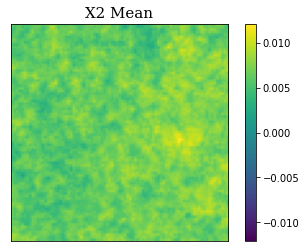

In [ ]:
plotMean(X2,'X2 Mean')

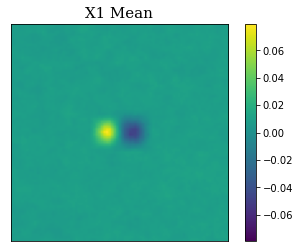

In [ ]:
plotMean(X1,'X1 Mean')

In [ ]:
final_list_X=[]
final_list_y=[]

for X in X1:
    final_list_X.append(X)
    final_list_y.append(1)
for X in X2:
    final_list_X.append(X)
    final_list_y.append(0)
X = np.array(final_list_X)
y = np.array(final_list_y)



In [ ]:
for i in range(len(X)):
    X[i]=normalized(X[i])

In [ ]:
len(X),len(y)

(7650, 7650)

In [ ]:
def plot_sample(X,y,index):
    plt.figure(figsize=(8,8))
    plt.imshow(X[index])
    plt.title(y[index])
    plt.colorbar()


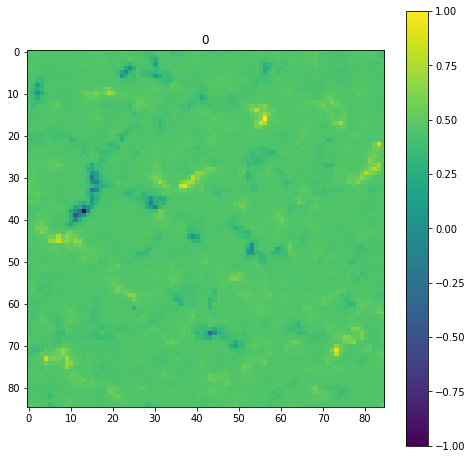

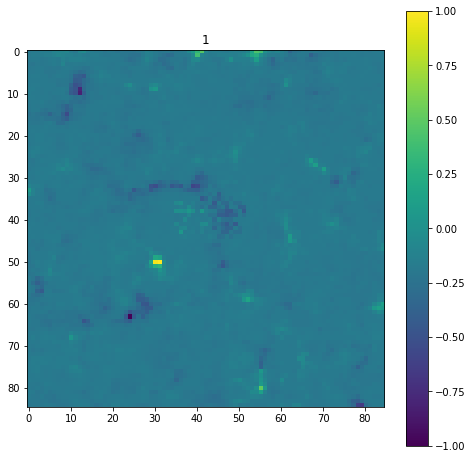

In [ ]:
plot_sample(X,y,6262)
plot_sample(X,y,54)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],85,85,1)
X_test = X_test.reshape(X_test.shape[0],85,85,1)
X_train.shape

(6885, 85, 85, 1)

In [ ]:
act_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR.npz')
lst1 = act_data.files
for item in lst1:
    print(item)
    print(act_data[item].shape)
    act_dataset=act_data[item]

arr
(512, 512, 65)


In [ ]:
new_AR_list=[]
x=int(512/2)
for i in range(65):
  new_AR_list.append(act_dataset[x-42:x+43, x-42:x+43,i])
new_AR_dataset = np.array(new_AR_list)
y_AR_test=np.array([1]*len(new_AR_dataset))

# MODEL GENERATION

In [ ]:
#cnn
from tensorflow.keras import datasets, layers, models
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(85,85,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    # layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])


In [ ]:
Adam = tf.keras.optimizers.Adam(learning_rate=5e-7)
cnn.compile(optimizer=Adam,
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 83, 83, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 19, 19, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 23104)             0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [ ]:
history=cnn.fit(X_train,y_train ,epochs=30,validation_data=(new_AR_dataset,y_AR_test))

Epoch 1/30
216/216 [==============================] - 3s 10ms/step - loss: 0.6929 - accuracy: 0.5057 - val_loss: 1.1012 - val_accuracy: 0.8000
Epoch 2/30
216/216 [==============================] - 2s 9ms/step - loss: 0.6924 - accuracy: 0.5229 - val_loss: 0.6060 - val_accuracy: 0.8769
Epoch 3/30
216/216 [==============================] - 2s 9ms/step - loss: 0.6919 - accuracy: 0.5374 - val_loss: 0.2595 - val_accuracy: 0.9385
Epoch 4/30
216/216 [==============================] - 2s 9ms/step - loss: 0.6913 - accuracy: 0.5590 - val_loss: 0.1064 - val_accuracy: 0.9692
Epoch 5/30
216/216 [==============================] - 2s 9ms/step - loss: 0.6908 - accuracy: 0.6107 - val_loss: 0.0486 - val_accuracy: 0.9846
Epoch 6/30
216/216 [==============================] - 2s 9ms/step - loss: 0.6904 - accuracy: 0.5903 - val_loss: 0.0186 - val_accuracy: 0.9846
Epoch 7/30
216/216 [==============================] - 2s 9ms/step - loss: 0.6900 - accuracy: 0.6385 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch

24/24 - 0s - loss: 0.6775 - accuracy: 0.7124 - 235ms/epoch - 10ms/step


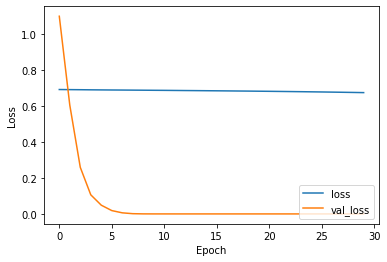

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(X_test,y_test, verbose=2)

24/24 - 0s - loss: 0.6775 - accuracy: 0.7124 - 128ms/epoch - 5ms/step


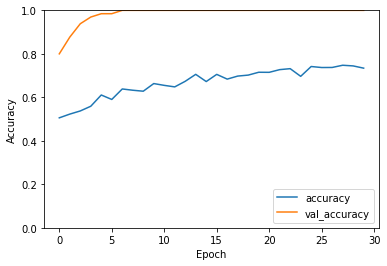

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(X_test,y_test, verbose=2)

# MODEL LOAD

In [ ]:
from joblib import Parallel, delayed
import joblib
 
 
# Save the model as a pickle in a file
# joblib.dump(cnn, 'model_SNR4_26_07.pkl')
 
# Load the model from the file
cnn = joblib.load('drive/MyDrive/Bfield Research/Models/model_SNR4_26_07.pkl')


INFO:tensorflow:Assets written to: ram://c331e166-976b-4352-827c-5aaa898be687/assets


INFO:tensorflow:Assets written to: ram://c331e166-976b-4352-827c-5aaa898be687/assets


['model_SNR4_26_07.pkl']

In [ ]:
cnn.evaluate(X_test,y_test)

24/24 [==============================] - 0s 5ms/step - loss: 0.6775 - accuracy: 0.7124


[0.6775435209274292, 0.7124183177947998]

In [ ]:
X_test = X_test.reshape(X_test.shape[0],85,85,1)
y_pred= cnn.predict(X_test)

In [ ]:
y_pred.shape,y_test.shape
y_labels= [int(np.around(element)) for element in y_pred]


In [ ]:
X_test=X_test.squeeze()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc= accuracy_score(y_test, y_labels)
cm=confusion_matrix(y_test,y_labels)
print(cm)
print(acc)

[[275  89]
 [131 270]]
0.7124183006535948


In [ ]:
tn, fp, fn, tp=cm.ravel()
tn, fp, fn, tp

(275, 89, 131, 270)

In [ ]:
tss=(tp/(tp+fn)+tn/(tn+fp))-1
print(tss)

0.42881121372393194


In [ ]:
def createPNList(y_t,y_l,X_t):
  fn_list=[]
  fp_list=[]
  tn_list=[]
  tp_list=[]
  for i in range(len(y_t)):
    if y_t[i]==1 and y_l[i]==0:
      fn_list.append(X_t[i])
    elif y_t[i]==0 and y_l[i]==1:  
      fp_list.append(X_t[i])
    elif y_t[i]==1 and y_l[i]==1: 
      tp_list.append(X_t[i])
    elif y_t[i]==0 and y_l[i]==0: 
      tn_list.append(X_t[i])
    
  fn_np_array = np.array(fn_list).squeeze()
  if len(fn_list)==1:
    fn_np_array = np.expand_dims(fn_np_array, axis=0)
  fp_np_array = np.array(fp_list).squeeze()
  tn_np_array = np.array(tn_list).squeeze()
  tp_np_array = np.array(tp_list).squeeze()
  return tn_np_array,fp_np_array,fn_np_array,tp_np_array

In [ ]:
TN,FP,FN,TP= createPNList(y_test,y_labels,X_test)
TN.shape,FP.shape,FN.shape,TP.shape

((275, 85, 85), (89, 85, 85), (131, 85, 85), (270, 85, 85))

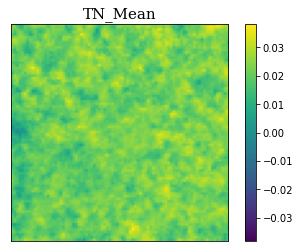

In [ ]:
plotMean(TN,'TN_Mean')

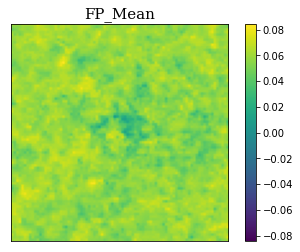

In [ ]:
plotMean(FP,'FP_Mean')

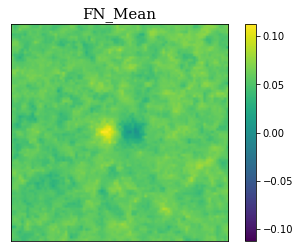

In [ ]:
plotMean(FN,'FN_Mean')

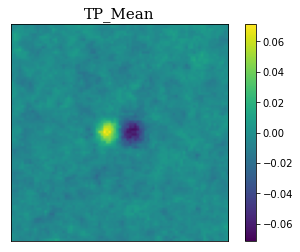

In [ ]:
plotMean(TP,'TP_Mean')

# AR DATA

In [ ]:
new_AR_dataset.shape

(65, 85, 85)

In [ ]:
for i in range(len(new_AR_dataset)):
    new_AR_dataset[i]=normalized(new_AR_dataset[i])

In [ ]:
# fig, axes = plt.subplots(8,8, figsize = (64,64))
# count=0
# for i in range(8):
#     for j in  range(8):
#         axes[i,j].imshow(new_AR_dataset[count])
#         count+=1

In [ ]:
new_AR_dataset = new_AR_dataset.reshape(new_AR_dataset.shape[0],85,85,1)
y_AR_pred= cnn.predict(new_AR_dataset)
y_AR_labels= [int(np.around(element)) for element in y_AR_pred]

In [ ]:
len(y_AR_test) , len(y_AR_labels)

(65, 65)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc1= accuracy_score(y_AR_test, y_AR_labels)
cm1=confusion_matrix(y_AR_test, y_AR_labels)
print(cm1)
print(acc1)

[[ 0  0]
 [ 1 64]]
0.9846153846153847


In [ ]:
TN_AR,FP_AR,FN_AR,TP_AR= createPNList(y_AR_test, y_AR_labels,new_AR_dataset)
FN_AR.shape,TP_AR.shape

((1, 85, 85), (64, 85, 85))

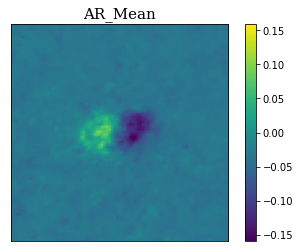

In [ ]:
plotMean(new_AR_dataset.squeeze(),'AR_Mean')

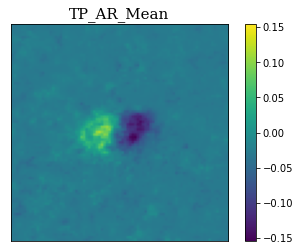

In [ ]:
plotMean(TP_AR,'TP_AR_Mean')

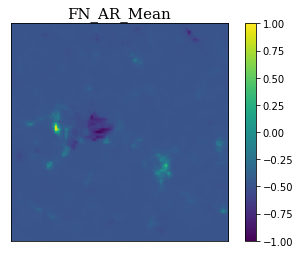

In [ ]:
plotMean(FN_AR,'FN_AR_Mean')

In [ ]:
TP_index=[]
FN_index=[]
for i in range(len(y_AR_test)):
    if y_AR_test[i]==1 and y_AR_labels[i]==1:
      TP_index.append(i)
    elif y_AR_test[i]==1 and y_AR_labels[i]==0:
      FN_index.append(i)
len(FN_index),len(TP_index)

(1, 64)

In [ ]:
print("TP:",TP_index)
print("FN:",FN_index)

TP: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
FN: [33]


# AR2 DATA

In [ ]:
act2_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR2.npz')
lst = act2_data.files
for item in lst:
    print(item)
    print(act2_data[item].shape)
    act2_dataset=act2_data[item]


arr
(512, 512, 57)


In [ ]:
new_AR2_list=[]
x=int(512/2)
for i in range(57):
  new_AR2_list.append(act2_dataset[x-42:x+43, x-42:x+43,i])
new_AR2_dataset = np.array(new_AR2_list)


In [ ]:
for i in range(len(new_AR2_dataset)):
     new_AR2_dataset[i]=normalized(new_AR2_dataset[i])

In [ ]:
# fig, axes = plt.subplots(5,11, figsize = (64,32))
# count=0
# for i in range(5):
#     for j in  range(11):
#         axes[i,j].imshow(new_AR2_dataset[count],vmin=-1,vmax=1)
#         count+=1

In [ ]:
new_AR2_dataset = new_AR2_dataset.reshape(new_AR2_dataset.shape[0],85,85,1)
y_AR2_pred= cnn.predict(new_AR2_dataset)
y_AR2_labels= [int(np.around(element)) for element in y_AR2_pred]
y_AR2_test=[1]*len(y_AR2_labels)

In [ ]:
len(y_AR2_test) , len(y_AR2_labels)

(57, 57)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc2= accuracy_score(y_AR2_test, y_AR2_labels)
cm2=confusion_matrix(y_AR2_test, y_AR2_labels)
print(cm2)
print(acc2)

[[ 0  0]
 [14 43]]
0.7543859649122807


In [ ]:
TN_AR2,FP_AR2,FN_AR2,TP_AR2= createPNList(y_AR2_test, y_AR2_labels,new_AR2_dataset)
FN_AR2.shape,TP_AR2.shape

((14, 85, 85), (43, 85, 85))

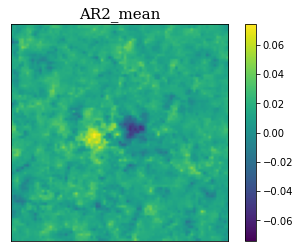

In [ ]:
plotMean(new_AR2_dataset.squeeze(),'AR2_mean')

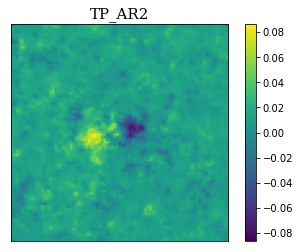

In [ ]:
plotMean(TP_AR2,'TP_AR2')

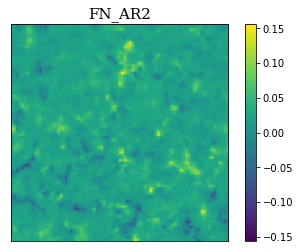

In [ ]:
plotMean(FN_AR2,'FN_AR2')

In [ ]:
TP_AR2_index=[]
FN_AR2_index=[]
for i in range(len(y_AR2_test)):
    if y_AR2_test[i]==1 and y_AR2_labels[i]==1:
      TP_AR2_index.append(i)
    elif y_AR2_test[i]==1 and y_AR2_labels[i]==0:
      FN_AR2_index.append(i)
len(FN_AR2_index),len(TP_AR2_index)

(14, 43)

In [ ]:
print("TP_AR2:",TP_AR2_index)
print("FN_AR2:",FN_AR2_index)

TP_AR2: [0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 36, 38, 40, 41, 42, 45, 46, 47, 48, 49, 53, 54, 55, 56]
FN_AR2: [1, 7, 22, 30, 33, 34, 35, 37, 39, 43, 44, 50, 51, 52]


# **AR3** DATA

In [ ]:
act3_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR3.npz')
lst = act3_data.files
for item in lst:
    print(item)
    print(act3_data[item].shape)
    act3_dataset=act3_data[item]

arr
(512, 512, 51)


In [ ]:
new_AR3_list=[]
x=int(512/2)
for i in range(51):
  new_AR3_list.append(act3_dataset[x-42:x+43, x-42:x+43,i])
new_AR3_dataset = np.array(new_AR3_list)

In [ ]:
for i in range(len(new_AR3_dataset)):
     new_AR3_dataset[i]=normalized(new_AR3_dataset[i])

In [ ]:
new_AR3_dataset = new_AR3_dataset.reshape(new_AR3_dataset.shape[0],85,85,1)
y_AR3_pred= cnn.predict(new_AR3_dataset)
y_AR3_labels= [int(np.around(element)) for element in y_AR3_pred]
y_AR3_test=[1]*len(y_AR3_labels)

In [ ]:
len(y_AR3_test) , len(y_AR3_labels)

(51, 51)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc3= accuracy_score(y_AR3_test, y_AR3_labels)
cm3=confusion_matrix(y_AR3_test, y_AR3_labels)
print(cm3)
print(acc3)

[[ 0  0]
 [31 20]]
0.39215686274509803


In [ ]:
TN_AR3,FP_AR3,FN_AR3,TP_AR3= createPNList(y_AR3_test, y_AR3_labels,new_AR3_dataset)
FN_AR3.shape,TP_AR3.shape

((31, 85, 85), (20, 85, 85))

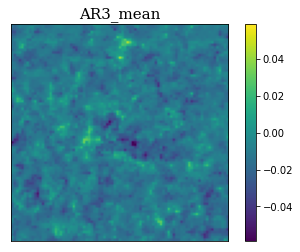

In [ ]:
plotMean(new_AR3_dataset.squeeze(),'AR3_mean')

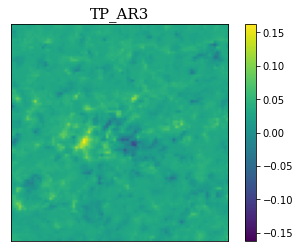

In [ ]:
plotMean(TP_AR3,'TP_AR3')

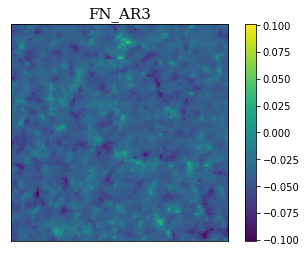

In [ ]:
plotMean(FN_AR3,'FN_AR3')

In [ ]:
TP_AR3_index=[]
FN_AR3_index=[]
for i in range(len(y_AR3_test)):
    if y_AR3_test[i]==1 and y_AR3_labels[i]==1:
      TP_AR3_index.append(i)
    elif y_AR3_test[i]==1 and y_AR3_labels[i]==0:
      FN_AR3_index.append(i)
len(FN_AR3_index),len(TP_AR3_index)

(31, 20)

In [ ]:
print("TP_AR3:",TP_AR3_index)
print("FN_AR3:",FN_AR3_index)

TP_AR3: [1, 2, 4, 8, 9, 12, 13, 14, 15, 16, 21, 22, 26, 27, 29, 33, 35, 39, 41, 42]
FN_AR3: [0, 3, 5, 6, 7, 10, 11, 17, 18, 19, 20, 23, 24, 25, 28, 30, 31, 32, 34, 36, 37, 38, 40, 43, 44, 45, 46, 47, 48, 49, 50]


# AR4 DATA

In [ ]:
act4_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR4.npz')
lst = act4_data.files
for item in lst:
    print(item)
    print(act4_data[item].shape)
    act4_dataset=act4_data[item]

arr
(512, 512, 47)


In [ ]:
new_AR4_list=[]
x=int(512/2)
for i in range(47):
  new_AR4_list.append(act4_dataset[x-42:x+43, x-42:x+43,i])
new_AR4_dataset = np.array(new_AR4_list)

In [ ]:
for i in range(len(new_AR4_dataset)):
     new_AR4_dataset[i]=normalized(new_AR4_dataset[i])

In [ ]:
new_AR4_dataset = new_AR4_dataset.reshape(new_AR4_dataset.shape[0],85,85,1)
y_AR4_pred= cnn.predict(new_AR4_dataset)
y_AR4_labels= [int(np.around(element)) for element in y_AR4_pred]
y_AR4_test=[1]*len(y_AR4_labels)

In [ ]:
len(y_AR4_test) , len(y_AR4_labels)

(47, 47)

In [ ]:
acc4= accuracy_score(y_AR4_test, y_AR4_labels)
cm4=confusion_matrix(y_AR4_test, y_AR4_labels)
print(cm4)
print(acc4)

[[ 0  0]
 [30 17]]
0.3617021276595745


In [ ]:
TN_AR4,FP_AR4,FN_AR4,TP_AR4= createPNList(y_AR4_test, y_AR4_labels,new_AR4_dataset)
FN_AR4.shape,TP_AR4.shape

((30, 85, 85), (17, 85, 85))

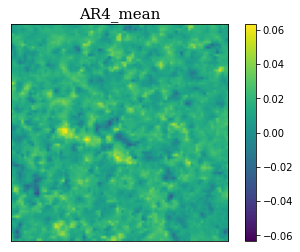

In [ ]:
plotMean(new_AR4_dataset.squeeze(),'AR4_mean')

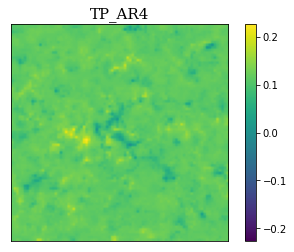

In [ ]:
plotMean(TP_AR4,'TP_AR4')

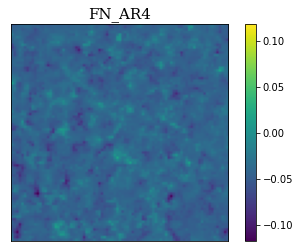

In [ ]:
plotMean(FN_AR4,'FN_AR4')

In [ ]:
TP_AR4_index=[]
FN_AR4_index=[]
for i in range(len(y_AR4_test)):
    if y_AR4_test[i]==1 and y_AR4_labels[i]==1:
      TP_AR4_index.append(i)
    elif y_AR4_test[i]==1 and y_AR4_labels[i]==0:
      FN_AR4_index.append(i)
len(FN_AR4_index),len(TP_AR4_index)

(30, 17)

In [ ]:
print("TP_AR4:",TP_AR4_index)
print("FN_AR4:",FN_AR4_index)

TP_AR4: [0, 2, 8, 10, 11, 12, 14, 16, 20, 21, 26, 27, 32, 36, 37, 38, 42]
FN_AR4: [1, 3, 4, 5, 6, 7, 9, 13, 15, 17, 18, 19, 22, 23, 24, 25, 28, 29, 30, 31, 33, 34, 35, 39, 40, 41, 43, 44, 45, 46]


# AR5 DATA

In [ ]:
act5_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR5.npz')
lst = act5_data.files
for item in lst:
    print(item)
    print(act5_data[item].shape)
    act5_dataset=act5_data[item]

arr
(108, 85, 85)


In [ ]:
new_AR5_list=[]
x=int(512/2)
for i in range(108):
  new_AR5_list.append(act5_dataset[i,:,:])
new_AR5_dataset = np.array(new_AR5_list)

In [ ]:
unnorm_new_AR5_dataset=new_AR5_dataset.copy()
for i in range(len(new_AR5_dataset)):
     new_AR5_dataset[i]=normalized(new_AR5_dataset[i])

In [ ]:
new_AR5_dataset = new_AR5_dataset.reshape(new_AR5_dataset.shape[0],85,85,1)
y_AR5_pred= cnn.predict(new_AR5_dataset)
y_AR5_labels= [int(np.around(element)) for element in y_AR5_pred]
y_AR5_test=[1]*len(y_AR5_labels)

In [ ]:
len(y_AR5_test) , len(y_AR5_labels)

(108, 108)

In [ ]:
acc5= accuracy_score(y_AR5_test, y_AR5_labels)
cm5=confusion_matrix(y_AR5_test, y_AR5_labels)
print('Confusion Matrix:')
print(cm5)
print('Accuracy:')
print(acc5)

Confusion Matrix:
[[ 0  0]
 [39 69]]
Accuracy:
0.6388888888888888


In [ ]:
TN_AR5,FP_AR5,FN_AR5,TP_AR5= createPNList(y_AR5_test, y_AR5_labels,new_AR5_dataset)
FN_AR5.shape,TP_AR5.shape

((39, 85, 85), (69, 85, 85))

In [ ]:
TP_AR5_index=[]
FN_AR5_index=[]
for i in range(len(y_AR5_test)):
    if y_AR5_test[i]==1 and y_AR5_labels[i]==1:
      TP_AR5_index.append(i)
    elif y_AR5_test[i]==1 and y_AR5_labels[i]==0:
      FN_AR5_index.append(i)
len(FN_AR5_index),len(TP_AR5_index)

(39, 69)

In [ ]:
print("TP_AR5:",TP_AR5_index)
print("FN_AR5:",FN_AR5_index)

TP_AR5: [0, 1, 2, 3, 4, 5, 8, 9, 10, 12, 16, 18, 19, 20, 21, 23, 27, 28, 29, 33, 34, 36, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 60, 62, 63, 65, 66, 68, 69, 70, 71, 74, 75, 76, 77, 79, 83, 84, 85, 86, 87, 88, 89, 91, 92, 96, 99, 102, 103, 104, 106, 107]
FN_AR5: [6, 7, 11, 13, 14, 15, 17, 22, 24, 25, 26, 30, 31, 32, 35, 37, 38, 45, 52, 58, 59, 61, 64, 67, 72, 73, 78, 80, 81, 82, 90, 93, 94, 95, 97, 98, 100, 101, 105]


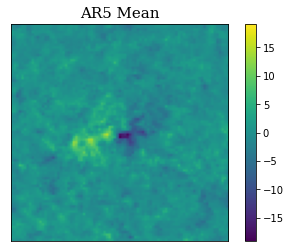

In [ ]:
plotMean(unnorm_new_AR5_dataset.squeeze(),'AR5 Mean')

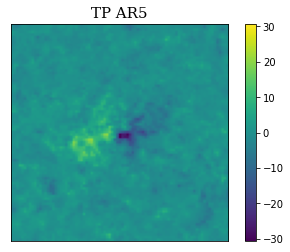

In [ ]:
plotMean(unnorm_new_AR5_dataset[TP_AR5_index],'TP AR5')

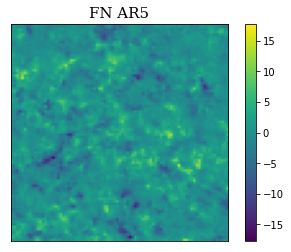

In [ ]:
plotMean(unnorm_new_AR5_dataset[FN_AR5_index],'FN AR5')

In [ ]:
# fig, axes = plt.subplots(11,10, figsize = (64,128))
# count=0
# for i in range(11):
#     for j in  range(10):
#         axes[i,j].imshow(new_AR5_dataset[count].squeeze(),vmin=-1,vmax=1)
#         count+=1

In [ ]:
hp=[0,1,2,4,5,10,12,13,16,18,19,20,27,28,29,42,46,51,53,56,60,62,63,69,70,71,83,86]
handpicked=unnorm_new_AR5_dataset[hp].squeeze()
nhp=[]
tppminushp_index=[]
totalminushp=[]

for z in range(108):
  if z not in hp:
    nhp.append(z)
nonhandpicked=unnorm_new_AR5_dataset[nhp].squeeze()

for x in TP_AR5_index:
  if x not in hp:
    tppminushp_index.append(x)
print(tppminushp_index)
tppminushp=unnorm_new_AR5_dataset[tppminushp_index].squeeze()


[3, 8, 9, 21, 23, 33, 34, 36, 39, 40, 41, 43, 44, 47, 48, 49, 50, 54, 55, 57, 65, 66, 68, 74, 75, 76, 77, 79, 84, 85, 87, 88, 89, 91, 92, 96, 99, 102, 103, 104, 106, 107]


In [ ]:
def common(lst1, lst2): 
    return list(set(lst1) & set(lst2))


In [ ]:

print(common(TP_AR5_index,hp))
print(hp)
len(common(TP_AR5_index,hp)),len(hp)

[0, 1, 2, 4, 5, 10, 12, 16, 18, 19, 20, 27, 28, 29, 42, 46, 51, 53, 56, 60, 62, 63, 69, 70, 71, 83, 86]
[0, 1, 2, 4, 5, 10, 12, 13, 16, 18, 19, 20, 27, 28, 29, 42, 46, 51, 53, 56, 60, 62, 63, 69, 70, 71, 83, 86]


(27, 28)

In [ ]:
len(handpicked),len(nonhandpicked),len(tppminushp)

(28, 80, 42)

In [ ]:
# fig, axes = plt.subplots(6,5, figsize = (64,128))
# count=0
# for i in range(6):
#     for j in  range(5):
#         axes[i,j].imshow(handpicked[count],cmap='binary')
#         count+=1

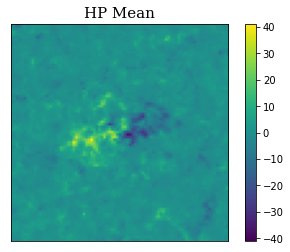

In [ ]:
plotMean(handpicked,'HP Mean')

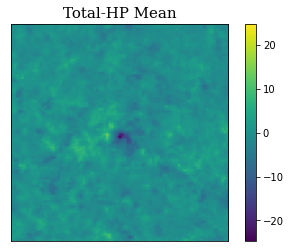

In [ ]:
plotMean(nonhandpicked,'Total-HP Mean')

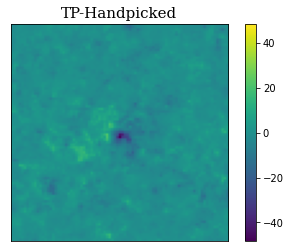

In [ ]:
plotMean(tppminushp,'TP-Handpicked')

In [ ]:
# fnplot=unnorm_new_AR5_dataset[FN_AR5_index].squeeze()
# fig, axes = plt.subplots(9,5, figsize = (32,64))
# count=0
# for i in range(9):
#     for j in  range(5):
#         axes[i,j].imshow(fnplot[count],cmap='binary')
#         count+=1

In [ ]:
# tpplot=unnorm_new_AR5_dataset[TP_AR5_index].squeeze()
# fig, axes = plt.subplots(7,10, figsize = (64,64))
# count=0
# for i in range(7):
#     for j in  range(10):
#         axes[i,j].imshow(tpplot[count],cmap='binary')
#         count+=1

# AR6 DATA

In [ ]:
act6_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR6.npz')
lst = act6_data.files
for item in lst:
    print(item)
    print(act6_data[item].shape)
    act6_dataset=act6_data[item]

arr
(512, 512, 53)


In [ ]:
new_AR6_list=[]
x=int(512/2)
for i in range(53):
  new_AR6_list.append(act6_dataset[x-42:x+43, x-42:x+43,i])
new_AR6_dataset = np.array(new_AR6_list)

In [ ]:
for i in range(len(new_AR6_dataset)):
     new_AR6_dataset[i]=normalized(new_AR6_dataset[i])

In [ ]:
new_AR6_dataset = new_AR6_dataset.reshape(new_AR6_dataset.shape[0],85,85,1)
y_AR6_pred= cnn.predict(new_AR6_dataset)
y_AR6_labels= [int(np.around(element)) for element in y_AR6_pred]
y_AR6_test=[1]*len(y_AR6_labels)

In [ ]:
len(y_AR6_test) , len(y_AR6_labels)

(53, 53)

In [ ]:
acc6= accuracy_score(y_AR6_test, y_AR6_labels)
cm6=confusion_matrix(y_AR6_test, y_AR6_labels)
print(cm6)
print(acc6)

[[ 0  0]
 [24 29]]
0.5471698113207547


In [ ]:
TN_AR6,FP_AR6,FN_AR6,TP_AR6= createPNList(y_AR6_test, y_AR6_labels,new_AR6_dataset)
FN_AR6.shape,TP_AR6.shape

((24, 85, 85), (29, 85, 85))

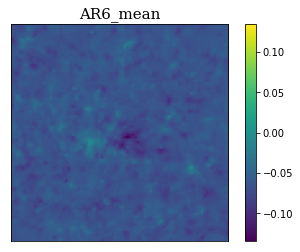

In [ ]:
plotMean(new_AR6_dataset.squeeze(),'AR6_mean')

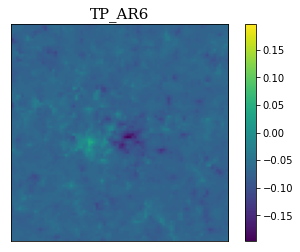

In [ ]:
plotMean(TP_AR6,'TP_AR6')

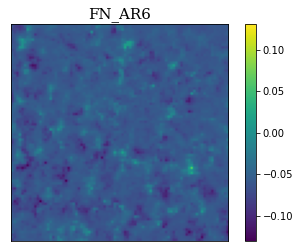

In [ ]:
plotMean(FN_AR6,'FN_AR6')

In [ ]:
TP_AR6_index=[]
FN_AR6_index=[]
for i in range(len(y_AR6_test)):
    if y_AR6_test[i]==1 and y_AR5_labels[i]==1:
      TP_AR6_index.append(i)
    elif y_AR6_test[i]==1 and y_AR6_labels[i]==0:
      FN_AR6_index.append(i)
len(FN_AR6_index),len(TP_AR6_index)

(9, 34)

In [ ]:
print("TP_AR6:",TP_AR6_index)
print("FN_AR6:",FN_AR6_index)

TP_AR6: [0, 1, 2, 3, 4, 5, 8, 9, 10, 12, 16, 18, 19, 20, 21, 23, 27, 28, 29, 33, 34, 36, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51]
FN_AR6: [6, 11, 13, 22, 26, 31, 32, 38, 52]


# **FLOW_DATA**

In [ ]:
flow_data = np.load('drive/MyDrive/Bfield Research/Datasets/tpi_fni_newdata.npz')
lst = flow_data.files
print(flow_data['tpi'].shape)
tni=flow_data['tpi']
print(flow_data['fni'].shape)
fni=flow_data['fni']

(53,)
(55,)


In [ ]:
tni.shape,fni.shape

((53,), (55,))

In [ ]:
tni

array([11813, 11152, 11597, 12003, 11945, 11978, 11456, 11511, 11300,
       11670, 11242, 11385, 11807, 11148, 11273, 11070, 11334, 11209,
       11416, 11915, 11510, 11141, 11130, 11116, 11640, 11627, 11824,
       11780, 11849, 11969, 11198, 11075, 11211, 11726, 11404, 11076,
       11137, 11500, 11702, 11842, 11843, 11867, 11414, 11703, 11318,
       11549, 11645, 11776, 11122, 11214, 12011, 11911, 11400])

In [ ]:
fni

array([11821, 11855, 11781, 11624, 12118, 11910, 11079, 11561, 11631,
       11962, 11431, 11310, 11570, 12119, 11174, 11565, 11080, 12105,
       11607, 11406, 11105, 11158, 11086, 11446, 11707, 11114, 11697,
       11699, 11706, 11311, 11239, 11297, 11066, 12098, 11199, 11136,
       11072, 11924, 11081, 12039, 11951, 11304, 11686, 11531, 11603,
       11437, 11154, 11874, 11752, 11074, 11786, 12041, 11322, 11551,
       11222])

In [ ]:
mag_ar_data = np.load('drive/MyDrive/Bfield Research/Datasets/mag_ar_list.npz')
lst = mag_ar_data.files
for item in lst:
    print(item)
    print(mag_ar_data[item].shape)
    mag_ar_dataset=mag_ar_data[item]

arr
(108,)


In [ ]:
mag_ar_dataset

array([11152, 11821, 11813, 11781, 11597, 11855, 11910, 12118, 11624,
       12003, 11079, 11561, 11631, 11945, 11978, 11456, 11962, 11431,
       11511, 11310, 11570, 11242, 11300, 11670, 12119, 11807, 11174,
       11565, 11385, 11148, 11070, 11334, 11273, 11915, 11416, 11209,
       11141, 11080, 12105, 11510, 11116, 11607, 11640, 11130, 11105,
       11406, 11158, 11627, 11824, 11086, 11707, 11446, 11697, 11114,
       11780, 11849, 11969, 11699, 11706, 11311, 11211, 11198, 11075,
       11239, 11297, 11199, 11066, 12098, 11136, 11404, 11726, 11072,
       11924, 11500, 11076, 11137, 11081, 11702, 11951, 12039, 11842,
       11686, 11304, 11843, 11531, 11414, 11867, 11603, 11703, 11549,
       11437, 11318, 11154, 11752, 11874, 11645, 11074, 12041, 11786,
       11776, 12011, 11322, 11214, 11122, 11222, 11551, 11911, 11400])

In [ ]:
mag_TP_list=[]
mag_FN_list=[]
for i in range(len(mag_ar_dataset)):
  for j in range(len(tni)):
    if mag_ar_dataset[i]==tni[j]:
      mag_TP_list.append(i)
  for j in range(len(fni)):
    if mag_ar_dataset[i]==fni[j]:
      mag_FN_list.append(i)




In [ ]:
len(mag_TP_list),len(mag_FN_list)

(53, 55)

In [ ]:
len(common(mag_TP_list,TP_AR5_index)),len(common(mag_TP_list,FN_AR5_index)),len(common(mag_FN_list,TP_AR5_index)),len(common(mag_FN_list,FN_AR5_index))

(39, 14, 30, 25)

In [ ]:
tptp=new_AR5_dataset[common(mag_TP_list,TP_AR5_index)].squeeze()
tpfn=new_AR5_dataset[common(mag_TP_list,FN_AR5_index)].squeeze()
fntp=new_AR5_dataset[common(mag_FN_list,TP_AR5_index)].squeeze()
fnfn=new_AR5_dataset[common(mag_FN_list,FN_AR5_index)].squeeze()

In [ ]:
tptpi=mag_ar_dataset[common(mag_TP_list,TP_AR5_index)]
tpfni=mag_ar_dataset[common(mag_TP_list,FN_AR5_index)]
fntpi=mag_ar_dataset[common(mag_FN_list,TP_AR5_index)]
fnfni=mag_ar_dataset[common(mag_FN_list,FN_AR5_index)]

In [ ]:
print(fnfni)

[11910 12118 11561 11431 12119 11174 11080 12105 11406 11697 11706 11311
 11297 12098 11924 11951 11686 11304 11437 11752 11874 12041 11786 11322
 11551]


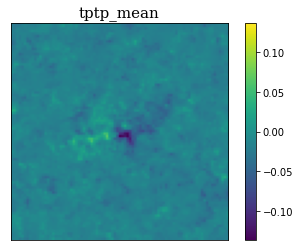

In [ ]:
plotMean(tptp,'tptp_mean')

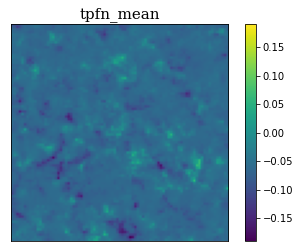

In [ ]:
plotMean(tpfn,'tpfn_mean')

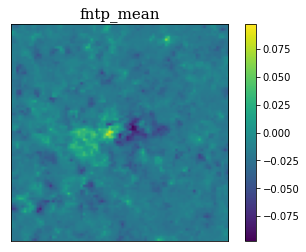

In [ ]:
plotMean(fntp,'fntp_mean')

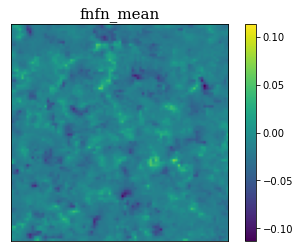

In [ ]:
plotMean(fnfn,'fnfn_mean')

In [ ]:
print(common(mag_TP_list,TP_AR5_index))
print(common(mag_TP_list,FN_AR5_index))
print(common(mag_FN_list,TP_AR5_index))
print(common(mag_FN_list,FN_AR5_index))

[0, 2, 4, 9, 18, 21, 23, 28, 29, 33, 34, 36, 39, 40, 42, 43, 47, 48, 54, 55, 56, 60, 62, 69, 70, 74, 75, 77, 83, 85, 86, 88, 89, 91, 99, 102, 103, 106, 107]
[32, 35, 100, 73, 13, 14, 15, 80, 22, 95, 25, 61, 30, 31]
[1, 3, 5, 8, 10, 12, 16, 19, 20, 27, 41, 44, 46, 49, 50, 51, 53, 57, 63, 65, 66, 68, 71, 76, 79, 84, 87, 92, 96, 104]
[6, 7, 11, 17, 24, 26, 37, 38, 45, 52, 58, 59, 64, 67, 72, 78, 81, 82, 90, 93, 94, 97, 98, 101, 105]


<function matplotlib.pyplot.show>

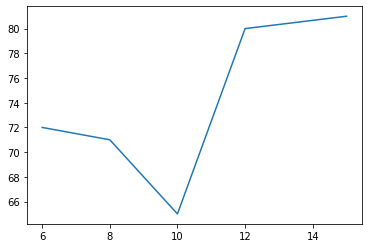

In [ ]:
revsnr=np.array([6,8,10,12,15])
tps=np.array([72,71,65,80,81])

plt.plot(revsnr, tps)
plt.show
